# **TCC_p04_Prepara_Palavras_Bonus_e_Nulas_para_Edmundson.ipynb**

# **Criar lista de palavras bônus e palavras nulas para o sumarizador Edmundson**
O objetivo deste notebook é criar palavras bônus e palavras nulas para o sumarizador Edmundson. As palavras bônus serão criadas a partir das ementas e das últimas duas frases do voto (normalmente, as conclusões). Já as palavras nulas serão formadas pelas stop words da biblioteca SpaCy, da biblioteca NLTK e pelos nomes dos relatores da base de acórdãos.

* Importante: as palavras não serão tratadas no formato do classificador com melhor resultado, no caso, o formato lematizado, pois o sumarizador é aplicado sem tratamento e é só após a sumarização que as palavras precisam ser lematizadas para, na etapa da classificação, estarem no mesmo formato do classificador vencedor. Como as palavras bônus e nulas são utilizadas na sumarização, não precisam passar pelo tratamento.

1. Importação de bibliotecas
* Pandas: para criação e manipulação de dataframes
* re: para utilização das expressões regulares em operações de substituições em string.
* numpy: para trabalhar com array.
* string: para importar sinais de pontuação.
* nltk: usada para tokenizar textos em sentenças, sentenças em palavras e para calcular a frequência das palavras nos blocos que guardam as palavras mais frequentes para uso no Edmundson.
* nltk punkt: Punkt é uma ferramenta de segmentação de frases neutra em termos de linguagem.
* nltk stopwords: palavras nulas.

2. Importação da biblioteca SpaCy
* Neste notebook, a SpaCy é utilizada para instanciar um Doc, um contêiner para acessar anotações linguísticas tokenizadas nas funções preprocessamento_ementa e prepocessamento_ultima_frase e para obtenção das stop words.

3. Montar Drive
> Com ***drive.mount***('/content/drive', force_remount=True) os diretórios de dados do ***Google Drive*** são montados para utilização no ***Colab*** permitindo salvar arquivos e modelos treinados para utilização posterior, inclusive, em outros notebooks e recuperar arquivos salvos por outros notebooks.

4. Funções 
*   prepocessamento_ementa: a ementa contém uma coleção de frases e palavras com pontuações, valores numéricos, stop words, etc. A função preprocessamento faz a limpeza nesse texto devolvendo apenas as palavras que serão usadas para compor a lista de palavras bônus. A função está descrita em docstring reproduzido a seguir.
```
  Recebe o texto da ementa. 
  Executa a função limpeza_texto. Em seguida, tokeniza o texto usando a tokenização da biblioteca   SpaCy, mantém apenas os verbos e substantivos e retira as stop words.
  :parâmetro texto: recebe o texto integral de uma ementa.
  :retorno str_lista: string com a lista das palavras do voto após a limpeza dos dados.  
```

*   prepocessamento_ultima_frase: as últimas frases de um voto, em geral, contém palavras importantes para definição do resultado do julgamento. A função preprocessamento faz a limpeza nesse texto devolvendo apenas as palavras que serão usadas para compor a lista de palavras bônus. A função está descrita em docstring reproduzido a seguir.
```
  Recebe o texto do voto e obtém as duas últimas frases após tokenização das sentenças. 
  Executa a função limpeza_texto. Em seguida, tokeniza o texto usando a tokenização da biblioteca SpaCy, mantém apenas os verbos e substantivos e retira as stop words.
  :parâmetro texto: recebe o texto integral de um voto.
  :retorno str_lista: string com a lista das palavras das últimas frases após a limpeza dos dados.   
```

* limpeza_texto: função auxiliar das funções prepocessamento_ementa e prepocessamento_ultima_frase, conforme docstring reproduzido a seguir.
```
  Faz limpeza do texto recebido excluíndo pontuações, números em moedas, leis, etc, letras soltas, palavras com duas letras, hífens iniciais, r$, espaços duplos e símbolos. O objetivo é deixar apenas palavras.
  :parâmetro texto: recebe um texto que pode ser de um voto, uma ementa, uma frase, etc.
  :retorno str_lista: string com a lista das palavras do texto recebido.  
```

5. Obtém as palavras mais frequentes das ementas.
* Neste bloco, o dataframe df_ementas será lido do drive para obtenção do texto das ementas e preprocessado. Após o preprocessamento, será obtida uma lista com todas as palavras de todas as ementas carregadas. Utilizando FreqDist da nltk serão obtidas as frequências de cada palavra e, em seguida, criada lista apenas com as palavras com frequência a partir de 200 ocorrências. O corte frequência 200 foi decidido após observação das palavras com as suas frequências. Esse grupo de palavras será gravado no drive para utilização pelo sumarizador Edmundson como palavras bônus. 

6. Obtém as palavras mais frequentes das últimas frases dos votos
* Neste bloco, serão lidos do drive os dataframes X_teste e X_treinamento para obtenção de todos os votos. Será criada uma lista contendo o texto dos votos. Cada voto será tokenizado em frases e as duas últimas frases em palavras utilizando a tokenização da nltk. As palavras receberão um tratamento similiar ao preprocessamento excluíndo pontuações, stop words, números em moedas, leis, etc, letras soltas, palavras com duas letras, hífens iniciais, r$, espaços duplos e símbolos. O objetivo é deixar apenas palavras. Utilizando FreqDist da nltk serão obtidas as frequências de cada palavra e, em seguida, criada lista apenas com as palavras com frequência a partir de 400 ocorrências. O corte frequência 400 foi decidido após observação das palavras com as suas frequências. Esse grupo de palavras será gravado no drive para utilização pelo sumarizador Edmundson como palavras bônus. 

7. Obtém nomes dos relatores
* Neste bloco, será lido do drive o dataframe df_atributos para obtenção dos nomes dos relatores, presidentes e conselheiros para formarem as palavras nulas para o Edmundson.
Os atributos citados foram obtidos por web scraping e além dos nomes dos relatores, outras palavras compõem os atributos, inclusive, NaN. Por isso, foi feita uma limpeza mantendo-se apenas strings, excluíndo-se stop words, pontuações, dígitos e palavras com menos de 3 letras. Das palavras que sobrarão, foram mantidos apenas os  nomes próprios e substantivos (muitos nomes próprios estavam aparecendo com substantivo). Mantive os substantivos porque a maioria era, na verdade, nome próprio. Verifiquei se o substantivo eventualmente fazia parte das palavras bônus e exclui os que faziam. Para seleção de nomes próprios e substantivos, foram usadas as anotações linguísticas (atributo classe gramatical (POS) do token) geradas na marcação de parte da fala (part-of-speech tagging) da SpaCy, especificamente, a classe gramatical da palavra.


8. Grava no drive as stop words
* Grava no drive as stop words concatenadas da SpaCy e NLTK


##1. Importação de bibliotecas

In [ ]:
import string
import re
import pandas as pd
import numpy as np

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words_nltk = nltk.corpus.stopwords.words('portuguese')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##2. Importação da biblioteca SpaCy

In [ ]:
!pip install spacy==2.3.5

     |████████████████████████████████| 10.4MB 7.8MB/s 
     |████████████████████████████████| 1.1MB 48.7MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
import spacy
spacy.__version__

'2.3.5'

In [ ]:
!python -m spacy download pt
pln = spacy.load("pt")

     |████████████████████████████████| 19.6MB 1.3MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.3.0-cp37-none-any.whl size=19557499 sha256=3acc91454643fa590a8da71d6d2b0768853e48615178b971fd9ad89df2d49bb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-nn71sk9f/wheels/f6/43/f6/949b5e2b48df37aa3ed81fc3f4af4154afa276518cc004b990
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words_spacy = STOP_WORDS

In [ ]:
stop_words = set(stop_words_nltk + list(stop_words_spacy))

In [ ]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

##3. Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


##4. Funções

In [ ]:
def preprocessamento_ementa(texto):
  """
  Recebe o texto da ementa. 
  Executa a função limpeza_texto. Em seguida, tokeniza o texto usando a tokenização da biblioteca SpaCy, mantém apenas os verbos e substantivos e retira as stop words.
  :parâmetro texto: recebe o texto integral de uma ementa.
  :retorno str_lista: string com a lista das palavras do voto após a limpeza dos dados.  
  """
  texto = limpeza_texto(texto)
  documento = pln(texto)
  lista = []
  for token in documento:
    if token.pos_ != 'NOUN' and token.pos_ != 'VERB':
      continue
    if token.text == 'assunto' or token.text == 'ementa' or len(token.text) < 3: #despreza sujeiras e palavras assunto e ementa
      continue 
    lista.append(token.text)    
  
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
def preprocessamento_ultima_frase(texto):
  """
  Recebe o texto do voto e obtém as duas últimas frases após tokenização das sentenças. 
  Executa a função limpeza_texto. Em seguida, tokeniza o texto usando a tokenização da biblioteca SpaCy, mantém apenas os verbos e substantivos e retira as stop words.
  :parâmetro texto: recebe o texto integral de um voto.
  :retorno str_lista: string com a lista das palavras das últimas frases após a limpeza dos dados.  
  """
  frases = sent_tokenize(texto)
  texto = frases[len(frases)-2] + frases[len(frases)-1] #obtém últimas frases
  texto = limpeza_texto(texto)
  documento = pln(texto)
  lista = []
  for token in documento:
    if token.pos_ != 'NOUN' and token.pos_ != 'VERB':
      continue
    if token.text == 'assunto' or token.text == 'ementa' or len(token.text) < 3: #despreza sujeiras e palavras assunto e ementa
      continue 
    lista.append(token.text)  

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
def limpeza_texto(texto):
  """
  Faz limpeza do texto recebido excluíndo pontuações, números em moedas, leis, etc, letras soltas, palavras com duas letras, 
  hífens iniciais, r$, espaços duplos e símbolos. O objetivo é deixar apenas palavras.
  :parâmetro texto: recebe um texto que pode ser de um voto, uma ementa, uma frase, etc.
  :retorno str_lista: string com a lista das palavras do texto recebido.  
  """
  texto = texto.lower()
  texto = re.sub('([¹²³£¢¬§ªº°]{1})', ' ', texto) #excluir o símbolos listados
  texto = re.sub('([!"#%&\'\(\)\*\+,\./:;<=>\?@\[\]\^_`\{\|\}~]{1})', ' ', texto) #excluir as pontuações, exceto o hífen
  texto = re.sub('([0-9]*)[\.]*([0-9]+,[0-9]+)', ' ', texto)  #excluir valores com decimais após vírgulas 10.000,00 30,00
  texto = re.sub('([0-9]+)[.]+([0-9]+)\/([0-9]+)', ' ', texto) #excluir valores tipo leis 9.420/99
  texto = re.sub('([0-9]+)\/([0-9]+)', ' ', texto) #excluir valores tipo leis 70/99
  texto = re.sub('([0-9]+)', ' ', texto) #excluir números
  texto = re.sub('( [a-z]{1} )', ' ', texto) #excluir letras soltas
  texto = re.sub('( [a-z]{2} )', ' ', texto) #excluir palavras com 2 letras
  texto = re.sub(' -([a-z]*)', r'\1', texto) #excluir hífens iniciais
  texto = texto.replace('r$', ' ') #excluir r$
  texto = re.sub('( [ ]*)', ' ', texto) #excluir espaços duplos
  texto = re.sub(r" +", ' ', texto)
  texto = re.sub('assunto', ' ', texto)
  texto = re.sub('ementa', ' ', texto)
  return texto

##5. Obtém as palavras mais frequentes das ementas

In [ ]:
#obtendo df de ementas gravado no drive
url = '/content/drive/MyDrive/df_ementas.csv' 
df_ementas = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True, quotechar='"', error_bad_lines=False) 

In [ ]:
pd_options = pd.options.display # Objeto para configuração do ambiente: número de linhas, colunas, precisão e etc
pd_options.max_colwidth = 200

In [ ]:
df_ementas.head(3)

,Processo,Ementa,Recurso,Assunto
0,10070000461200797,Ementa(s) Assunto: Imposto sobre a Renda de Pessoa Física - IRPF Ano-calendário: 2003 IRPF. OMISSÃO DE RENDIMENTOS DO TRABALHO. AUXÍLIO MATERNIDADE. A fonte pagadora dispõe de convênio com o INSS...,voluntário,irpf
1,10070000654200748,Ementa(s) Assunto: Imposto sobre a Renda de Pessoa Física - IRPF Exercício: 2004 OMISSÃO DE RENDIMENTOS Os rendimentos tributáveis recebidos pelo contribuinte devem ser integramente informados em...,voluntário,irpf
2,10070000947200644,"Ementa(s) Assunto: Imposto sobre a Renda de Pessoa Física - IRPF Exercício: 2003 RENDIMENTOS DECORRENTES DE AÇÃO JUDICIAL. DESPESAS COM ADVOGADO. Poderá ser deduzido, para fins de determinação da...",voluntário,irpf


In [ ]:
#rodar preprocessamento selecionando entre lema, stemer ou original de acordo com o tipo_modelo informado
df_ementas['Ementa'] = df_ementas['Ementa'].apply(preprocessamento_ementa)

In [ ]:
df_ementas.head(3)

,Processo,Ementa,Recurso,Assunto
0,10070000461200797,imposto renda pessoa irpf omissão rendimentos trabalho maternidade dispõe convênio inss pagamento maternidade comprovado autos diligência equívoco duplicidade informações fontes afastada omissão r...,voluntário,irpf
1,10070000654200748,imposto renda pessoa exercício omissão rendimentos rendimentos recebidos contribuinte informados declaração cabendo lançamento parcela omitida contribuição previdência dedução determinação cálculo...,voluntário,irpf
2,10070000947200644,imposto renda pessoa exercício rendimentos ação despesas advogado deduzido fins determinação cálculo sujeita incidência despesas ação recebimento rendimentos,voluntário,irpf


In [ ]:
#obtém lista de palavras das ementas
lista_ementas = df_ementas['Ementa']
lista_ementas = list(lista_ementas)
#
palavra_ementa = []
for ementa in lista_ementas:
  lista_palavras = ementa.split()
  lista_palavras = [palavra for palavra in lista_palavras]
  for palavra in lista_palavras:
    palavra_ementa.append(palavra)

In [ ]:
#calcula a frequência de cada palavra
frequencia = FreqDist(palavra_ementa)
frequencia.most_common()

In [ ]:
#cria lista de palavras com frequência a partir de 200 
listaPalavras = []
for palavra, qtde in frequencia.most_common():
  if qtde < 200:
    continue
  listaPalavras.append(palavra)

In [ ]:
#grava dataframe com as palavras mais frequentes da ementa
df_palavras = pd.DataFrame(data=listaPalavras)
df_palavras.sort_values(by=[0], inplace=True)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

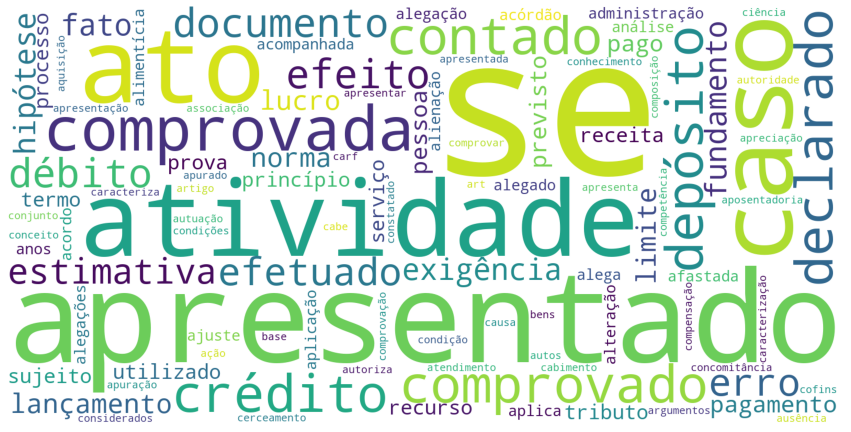

In [ ]:
palavras = df_palavras.iloc[:, 0].values
#palavras = votos #[:100]
all_palavras = " ".join(s for s in palavras)
#stopwords = ['se', 'folha', 'per', 'dcomp', 'dctf', 'lei', 'artigo', 'instrução', 'normativa', 'voto']
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="white", max_words=100,
                      width=1600, height=800).generate(all_palavras)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [ ]:
#salvando no drive o dataframe com as palavras mais frequentes da ementa
df_palavras.to_csv('/content/drive/MyDrive/df_palavras_ementa.csv', sep = ';', index = False, encoding = 'windows-1252')

##6. Obtém as palavras mais frequentes das últimas frases dos votos

In [ ]:
#Carregar dataframe teste (X e y) diretamente do drive.
url = '/content/drive/MyDrive/X_teste_1781.csv' 
X_teste = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True) 
url = '/content/drive/MyDrive/X_treinamento_7124.csv' 
X_treinamento = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True) 

In [ ]:
df_votos = pd.concat([X_teste, X_treinamento])

In [ ]:
#rodar preprocessamento selecionando entre lema, stemer ou original de acordo com o tipo_modelo informado
df_votos['voto'] = df_votos['voto'].apply(preprocessamento_ultima_frase)

In [ ]:
df_votos.head(3)

,voto
0,exposto voto anular conhecer recurso restabelecendo-se decisão instância totalidade decorrência entendimento conhece embargos declaração perda objeto
1,exposto voto negar provimento recurso
2,vejo deixar considerar arbitrado fiscalização base sipt caracterização apontada subavaliação vtn declarado vtn apontado laudo fato beneficia considerando acatamento requerido implicaria agravament...


In [ ]:
#cria um ndarray com os votos
votos = df_votos.iloc[:, 0].values

In [ ]:
#obtém lista de palavras das últimas frases
lista_ultimas_palavras = []
for frase_votos in votos:
  for palavra_frase in frase_votos.split():
    lista_ultimas_palavras.append(palavra_frase)

In [ ]:
#calcula a frequência de cada palavra
frequencia = FreqDist(lista_ultimas_palavras)
frequencia.most_common()[:5]

[('recurso', 9931),
 ('provimento', 8947),
 ('voto', 7698),
 ('exposto', 5970),
 ('artigo', 3726)]

In [ ]:
#cria lista de palavras com frequência a partir de 400 
listaPalavras = []
for palavra, qtde in frequencia.most_common():
  if qtde < 400:
    continue
  listaPalavras.append(palavra)

In [ ]:
#grava dataframe com as palavras mais frequentes das últimas frases
df_palavras = pd.DataFrame(data=listaPalavras)
df_palavras.sort_values(by=[0], inplace=True)

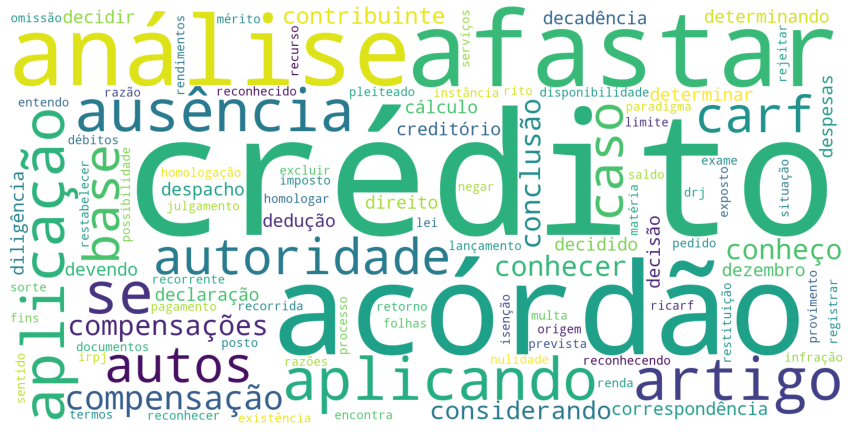

In [ ]:
palavras = df_palavras.iloc[:, 0].values
#palavras = votos #[:100]
all_palavras = " ".join(s for s in palavras)
#stopwords = ['se', 'folha', 'per', 'dcomp', 'dctf', 'lei', 'artigo', 'instrução', 'normativa', 'voto']
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="white", max_words=100,
                      width=1600, height=800).generate(all_palavras)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [ ]:
#salvando no drive o dataframe com as palavras mais frequentes das últimas frases
df_palavras.to_csv('/content/drive/MyDrive/df_palavras_ultima_frase.csv', sep = ';', index = False, encoding = 'windows-1252')

##7. Obtém nomes dos relatores

In [ ]:
#Carregar dataframe de atributos diretamente do drive.
url = '/content/drive/MyDrive/df_atributos.csv' 
df_a = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True)
df_a.columns = df_a.columns.str.lower() 

In [ ]:
df_a.head(3)

,processo,recurso,materia,assunto,relator,presidente,conselheiros,decisao,voto vencedor
0,10070000461200797,voluntário,imposto de renda pessoa física,irpf,marcelo milton da silva risso,carlos henrique de oliveira,"carlos henrique de oliveira, ana cecilia lustosa da cruz, dione jesabel wasilewski, josé alfredo duarte filho, marcelo milton da silva risso, carlos alberto do amaral azeredo, daniel melo mendes...",unanimidade,NaN
1,10070000654200748,voluntário,irpf - omissão de rendimentos,irpf,mônica renata mello fereira stoll,cláudia cristina noira passos da costa develly montez,"claudia cristina noira passos da costa develly montez, mônica renata mello fereira stoll, thiago duca amoni e virgílio cansino gil.",unanimidade,NaN
2,10070000947200644,voluntário,irpf,irpf,determinando o recalculo do tributo devido nos termos do voto do,carlos henrique de oliveira,"carlos henrique de oliveira, ana cecília lustosa da cruz, dione jesabel wasilewski, josé alfredo duarte filho, marcelo milton da silva risso, carlos alberto do amaral azeredo, daniel melo mendes...",unanimidade,NaN


In [ ]:
#cria um ndarray com os nomes dos relatores
relatores = df_a.iloc[:, 4].values
presidentes = df_a.iloc[:, 5].values
conselheiros = df_a.iloc[:, 6].values
lista_nomes_df = np.concatenate((relatores, presidentes, conselheiros))

In [ ]:
#exclui NaN, pontuações, stop words, etc.
lista_relatores = []
for item_lista in lista_nomes_df:
  if not isinstance(item_lista, str):
    continue
  for palavra in item_lista.split():
    if palavra in stop_words or palavra in string.punctuation or len(palavra) < 3 or palavra.isdigit():
      continue
    lista_relatores.append(palavra)

In [ ]:
#calcula a frequência de cada palavra
frequencia = FreqDist(lista_relatores)
frequencia.most_common()[:5]

[('oliveira', 8007),
 ('costa', 7427),
 ('silva', 6970),
 ('luiz', 6593),
 ('souza', 6378)]

In [ ]:
#cria lista de palavras com frequência a partir de 50
lista_relatores = []
for palavra, qtde in frequencia.most_common():
  if qtde < 50:
    continue
  lista_relatores.append(palavra)

In [ ]:
#carrega do drive as palavras bônus para testar se na lista de relatores tem alguma palavra bônus
url = '/content/drive/MyDrive/df_palavras_ultima_frase.csv' 
df_ultimas = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True)
url = '/content/drive/MyDrive/df_palavras_ementa.csv' 
df_ementa = pd.read_csv(url, sep=';', engine='python', encoding='windows-1252', low_memory=True)
ultimas = df_ultimas.iloc[:, 0].values
ementa = df_ementa.iloc[:, 0].values
lista_palavras_bonus = np.concatenate((ultimas, ementa))

In [ ]:
#mantém apenas nomes próprios e substantivos (muitos nomes próprios estavam aparecendo com substantivo).
#preferi manter os substantivos porque a maioria era nome próprio. 
#Verifiquei se o substantivo eventualmente fazia parte das palavras bônus e exclui os que faziam.
documento = pln(str(lista_relatores))
lista_nomes = []
for token in documento:
  if token.pos_ in ['VERB', 'INTJ', 'ADV', 'ADJ', 'PUNCT']:
    continue
  if token.text in lista_palavras_bonus:
    continue
  lista_nomes.append(token.text)

In [ ]:
lista_nomes[:8]

['oliveira', 'costa', 'silva', 'luiz', 'souza', 'carlos', 'paulo', 'henrique']

In [ ]:
#grava dataframe com as palavras dos nomes dos relatores
df_palavras = pd.DataFrame(data=lista_nomes)
df_palavras.sort_values(by=[0], inplace=True)

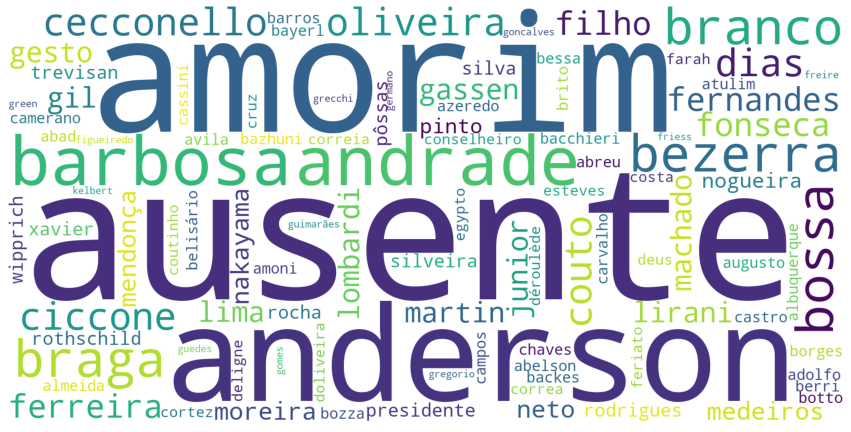

In [ ]:
palavras = df_palavras.iloc[:, 0].values
all_palavras = " ".join(s for s in palavras)
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="white", max_words=100,
                      width=1600, height=800).generate(all_palavras)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(15,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

In [ ]:
#salvando no drive o dataframe com os nomes dos relatores
df_palavras.to_csv('/content/drive/MyDrive/df_palavras_relatores.csv', sep = ';', index = False, encoding = 'windows-1252')

8. Grava no drive as stop words

In [ ]:
#grava dataframe com as palavras dos nomes dos relatores
df_palavras = pd.DataFrame(data=stop_words)
df_palavras.sort_values(by=[0], inplace=True)

In [ ]:
#salvando no drive o dataframe com as palavras nulas formadas pelos nomes dos relatores e pelas stop words
df_palavras.to_csv('/content/drive/MyDrive/df_palavras_stop_words.csv', sep = ';', index = False, encoding = 'windows-1252')